# Cumulative Matching Characteristic (CMC) 

In [60]:
from matplotlib import pyplot as plt
import pandas as pd

In [95]:
file_path = r"D:\KSIP\csv\GlobalDict_14_27.csv"
df_global_dict = pd.read_csv(file_path)
df_global_dict.head(5)

,ProbeID,Rank,Score
0,101,128,7
1,102,1,41
2,104,816,4
3,105,213,7
4,106,2793,5


## Plot Rank PDF

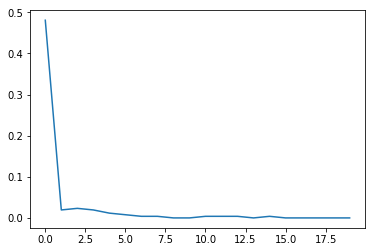

In [56]:
rank = df_global_dict['Rank']
pdf = []
rank = rank.value_counts(1)

for i in range(1,21):
    if i in rank:
        pdf.append(rank[i])
    else:
        pdf.append(0)

plt.plot(pdf)

## Plot Rank CMC

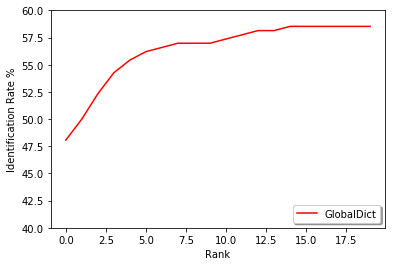

In [94]:
cdf = [pdf[0]*100]

for i in range(1,20):
    cdf.append(cdf[i-1] + pdf[i]*100)

# fig, ax = plt.subplots()

plt.ylim([40,60])
plt.plot(cdf,color='red')

plt.xlabel('Rank')
plt.ylabel('Identification Rate %')

plt.legend(('GlobalDict',),
           loc='lower right', shadow=True)